In [1]:
import xarray as xr
from netCDF4 import Dataset
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import load_data
import wrf
from datetime import datetime
import matplotlib.dates as mdates

In [2]:
file = '/glade/u/home/hardt/sar_p_month'
print(file)

/glade/u/home/hardt/sar_p_month


In [3]:
ifile = open(file,'r')

In [4]:
data = ifile.readlines()

In [5]:
print(data[0].rstrip())
print(data[2].rstrip())
print(data[3].rstrip())

Linux 2.6.32-504.3.3.el6.x86_64 (bci-a-data) 	01/01/2021 	_x86_64_	(32 CPU)
12:00:01 AM     CPU     %user     %nice   %system   %iowait    %steal     %idle
12:10:01 AM     all      6.00      0.00      2.09      3.27      0.00     88.64


In [6]:
user = []
system = []
iowait = []
times = []
i = 0
data_obj = ''
for line in data:
    
    h = line.split()
    
    if len(h) > 0:

        if h[0] == 'Linux':
            date_obj = h[3]
            year = int(date_obj[6:10])
            month = int(date_obj[0:2])
            day = int(date_obj[3:5])
            continue
        
        if h[0] == 'Average:':
            continue
        
        if h[2] == 'CPU':
            continue
        else:
                
            hour = int(h[0][0:2])
            minute = int(h[0][3:5])
            
            if h[1] == 'AM':
                if hour == 12:
                    hour = 0
            else:
                if hour != 12:
                    hour = hour + 12

            #print(i, year, month, day, hour, minute, h[1])
            times.append(datetime(year, month, day, hour, minute))
            user.append(float(h[3]))
            system.append(float(h[5]))
            iowait.append(float(h[6]))
            i = i + 1


In [7]:
print(len(times))

4265


In [8]:
ptime = np.array(times)
psystem = np.array(system)
puser = np.array(user)
piowait = np.array(iowait)

In [9]:
s = np.argsort(ptime)
print(s)
ptime = ptime[s]
psystem = psystem[s]
puser = puser[s]
piowait = piowait[s]

[2835 2836 2837 ... 2832 2833 2834]


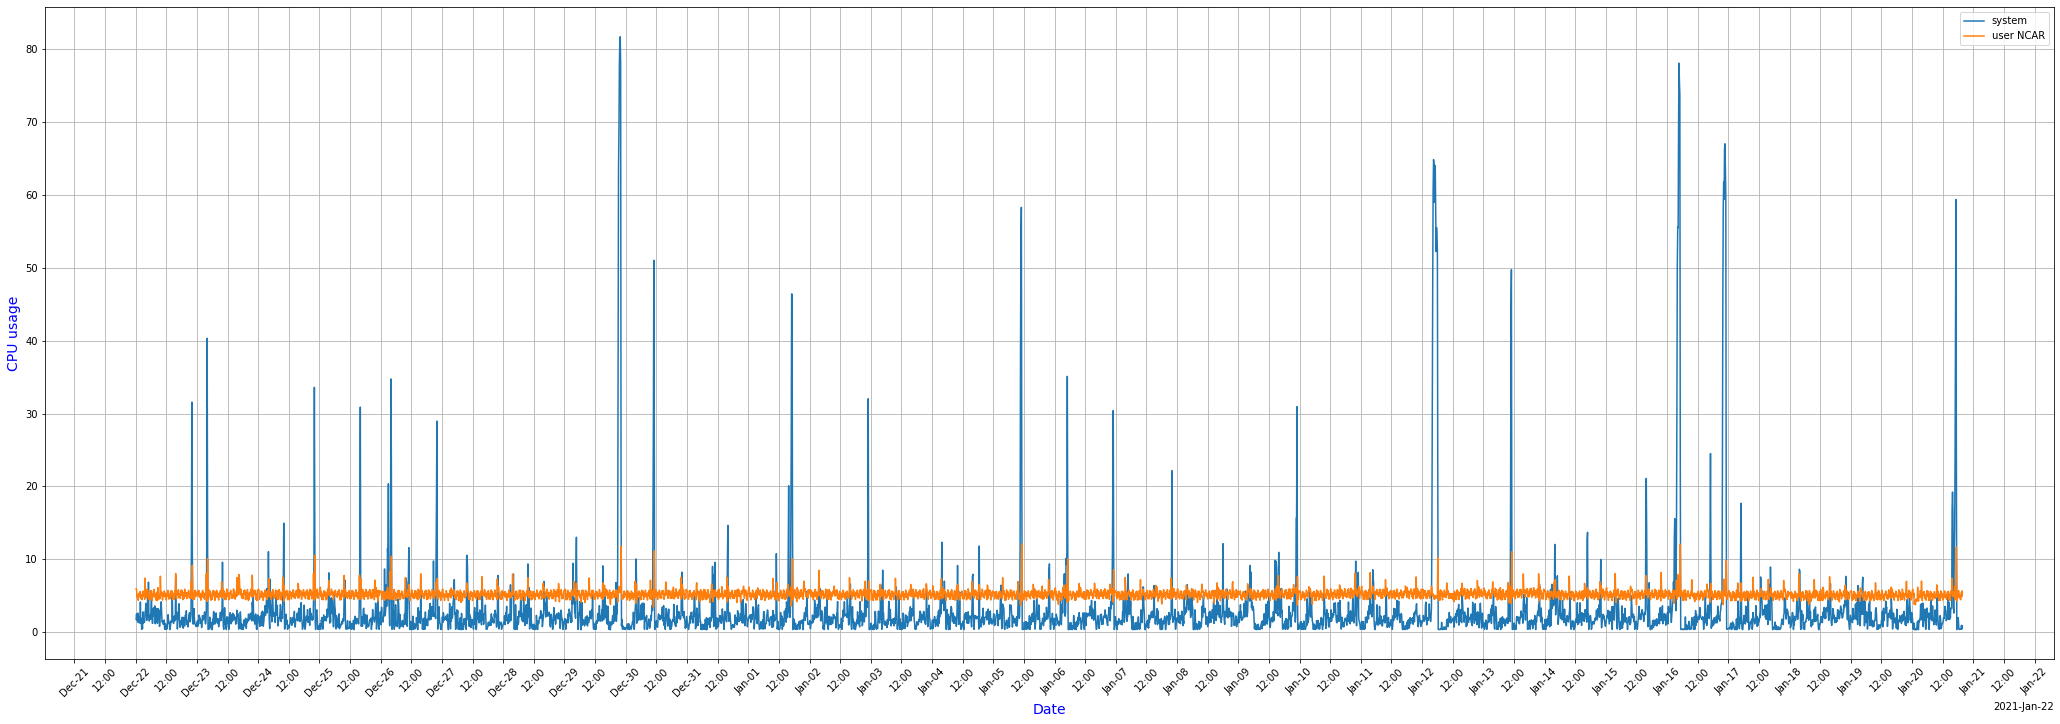

In [10]:
fig, ax = plt.subplots(figsize=(36, 12))
#
plt.setp(ax.get_xticklabels(), rotation=45)
#
locator = mdates.AutoDateLocator(minticks=40, maxticks=80)
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
#
ax.set_title("", color='blue', fontsize=14)
ax.set_xlabel("Date", color='blue', fontsize=14)
ax.set_ylabel("CPU usage", color='blue', fontsize=14)
#ax.set(xlabel="Date",
#       ylabel="system CPU usage",
#       title="Daily Total Precipitation\nBoulder, Colorado in July 2018")

plt.plot(ptime, psystem, label='system')
plt.plot(ptime, puser, label='user NCAR')
plt.grid(True)
plt.legend()
#
#ax2=ax.twinx()
#ax2.plot(ptime, piowait, label='iowait', color='green')
#ax2.set_ylabel("iowait",color="blue",fontsize=14)
#ax2.set_ylim([0, 2])
#plt.legend(loc='center right')

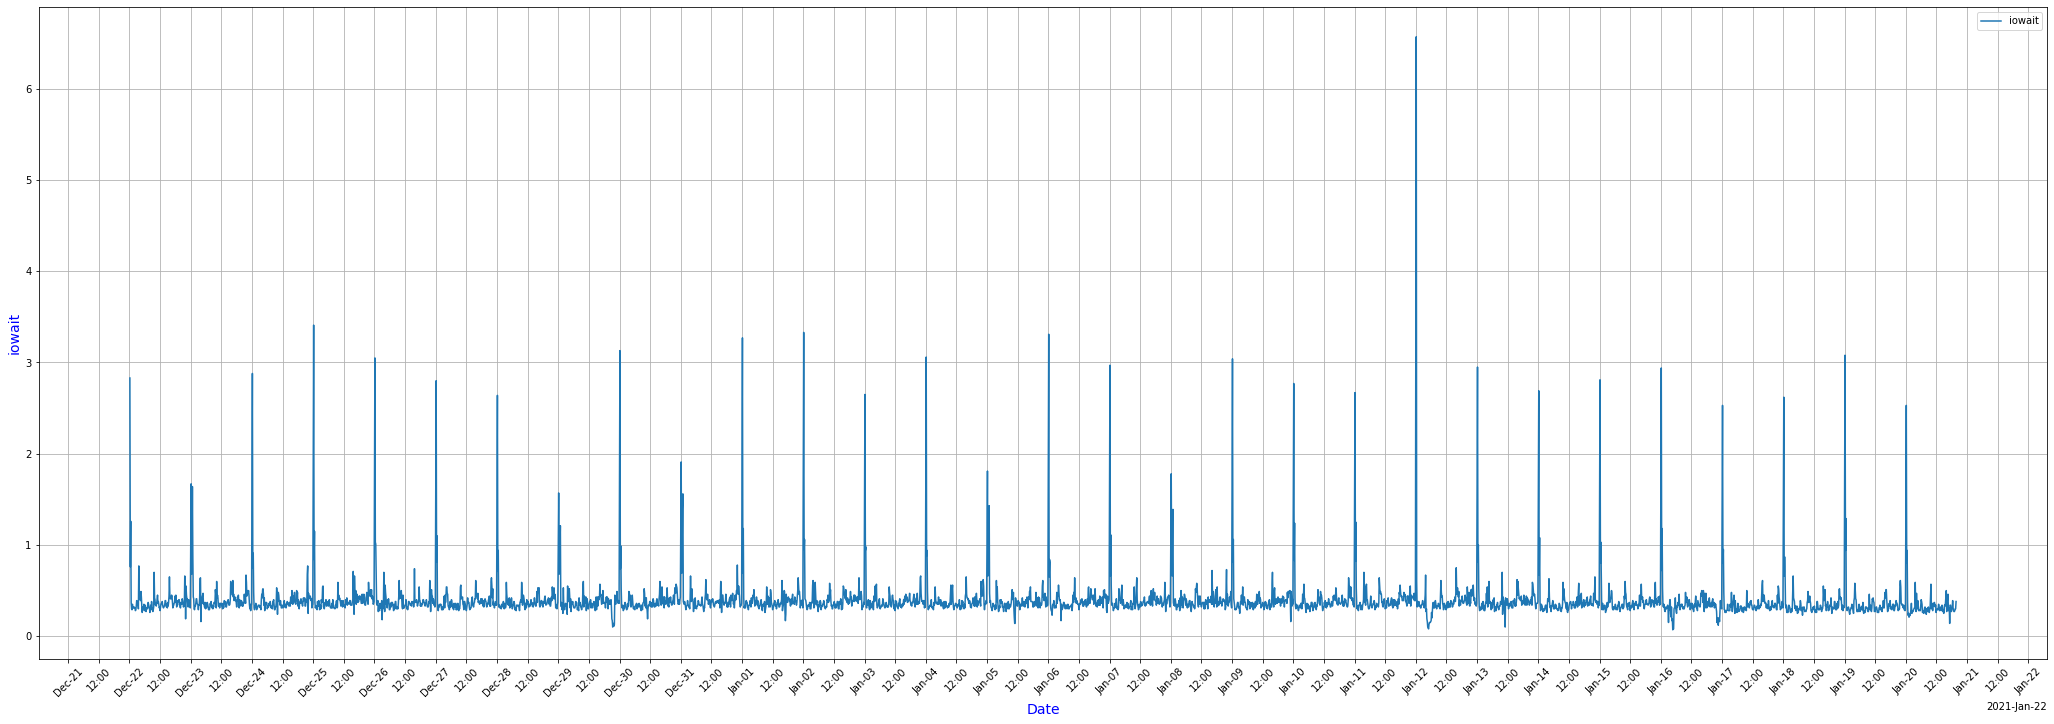

In [30]:
fig, ax = plt.subplots(figsize=(36, 12))
#
plt.setp(ax.get_xticklabels(), rotation=45)
#
locator = mdates.AutoDateLocator(minticks=40, maxticks=80)
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
#
ax.set_title("", color='blue', fontsize=14)
ax.set_xlabel("Date", color='blue', fontsize=14)
ax.set_ylabel("iowait", color='blue', fontsize=14)
#ax.set(xlabel="Date",
#       ylabel="system CPU usage",
#       title="Daily Total Precipitation\nBoulder, Colorado in July 2018")

plt.plot(ptime, piowait, label='iowait')
#plt.plot(ptime, puser, label='user NCAR')
plt.grid(True)
plt.legend()


In [27]:
iowait = piowait[piowait > 1.5]
times = ptime[piowait > 1.5]

In [31]:
print(times.shape)
i=0
for time in times:
    print(time, iowait[i])
    i = i + 1

(32,)
2020-12-22 00:10:00 2.83
2020-12-23 00:10:00 1.67
2020-12-23 00:40:00 1.64
2020-12-24 00:10:00 2.88
2020-12-25 00:10:00 3.41
2020-12-26 00:10:00 3.05
2020-12-27 00:10:00 2.8
2020-12-28 00:10:00 2.64
2020-12-29 00:10:00 1.57
2020-12-30 00:10:00 3.13
2020-12-31 00:10:00 1.91
2020-12-31 00:50:00 1.56
2021-01-01 00:10:00 3.27
2021-01-02 00:10:00 3.33
2021-01-03 00:10:00 2.65
2021-01-04 00:10:00 3.06
2021-01-05 00:10:00 1.81
2021-01-06 00:10:00 3.31
2021-01-07 00:10:00 2.97
2021-01-08 00:10:00 1.78
2021-01-09 00:10:00 3.04
2021-01-10 00:10:00 2.77
2021-01-11 00:10:00 2.67
2021-01-12 00:10:00 6.57
2021-01-13 00:10:00 2.95
2021-01-14 00:10:00 2.69
2021-01-15 00:10:00 2.81
2021-01-16 00:10:00 2.94
2021-01-17 00:10:00 2.53
2021-01-18 00:10:00 2.62
2021-01-19 00:10:00 3.08
2021-01-20 00:10:00 2.53


In [11]:
#
# look for areas where system cpu usage >= 40
#
tsystem = psystem[psystem>=40]
tuser = puser[psystem>=40]
ttime = ptime[psystem>=40]
tiowait = piowait[psystem>=40]

In [12]:
print(ttime.shape)
for time in ttime:
    print(time)

(43,)
2020-12-23 04:00:00
2020-12-29 21:10:00
2020-12-29 21:20:00
2020-12-29 21:30:00
2020-12-29 21:40:00
2020-12-29 21:50:00
2020-12-29 22:00:00
2020-12-30 11:00:00
2021-01-01 17:00:00
2021-01-01 17:10:00
2021-01-05 10:50:00
2021-01-05 11:00:00
2021-01-12 04:10:00
2021-01-12 04:20:00
2021-01-12 04:30:00
2021-01-12 04:40:00
2021-01-12 04:50:00
2021-01-12 05:00:00
2021-01-12 05:10:00
2021-01-12 05:20:00
2021-01-12 05:30:00
2021-01-12 05:40:00
2021-01-12 05:50:00
2021-01-12 06:00:00
2021-01-13 10:50:00
2021-01-13 11:00:00
2021-01-16 04:00:00
2021-01-16 04:10:00
2021-01-16 04:20:00
2021-01-16 04:30:00
2021-01-16 04:40:00
2021-01-16 04:50:00
2021-01-16 05:00:00
2021-01-16 21:50:00
2021-01-16 22:00:00
2021-01-16 22:10:00
2021-01-16 22:20:00
2021-01-16 22:30:00
2021-01-16 22:40:00
2021-01-16 22:50:00
2021-01-16 23:00:00
2021-01-20 17:00:00
2021-01-20 17:10:00


In [15]:
#
# get the 1/12/2021 data
#
start_date = datetime(2020,12, 28, 20, 0)
end_date = datetime(2020,12, 30, 0, 0)
#
b_times = ptime[ ptime >= start_date ]
be_times = b_times[ b_times < end_date ]
#
b_system = psystem[ ptime >= start_date ]
be_system = b_system[b_times < end_date ]
#
b_user = puser[ ptime >= start_date ]
be_user = b_user[b_times < end_date ]
#
b_iowait = piowait[ ptime >= start_date ]
be_iowait = b_iowait[b_times < end_date]
#
print(be_times.size)
print(be_system.size)
print(be_user.size)
print(be_iowait.size)

167
167
167
167


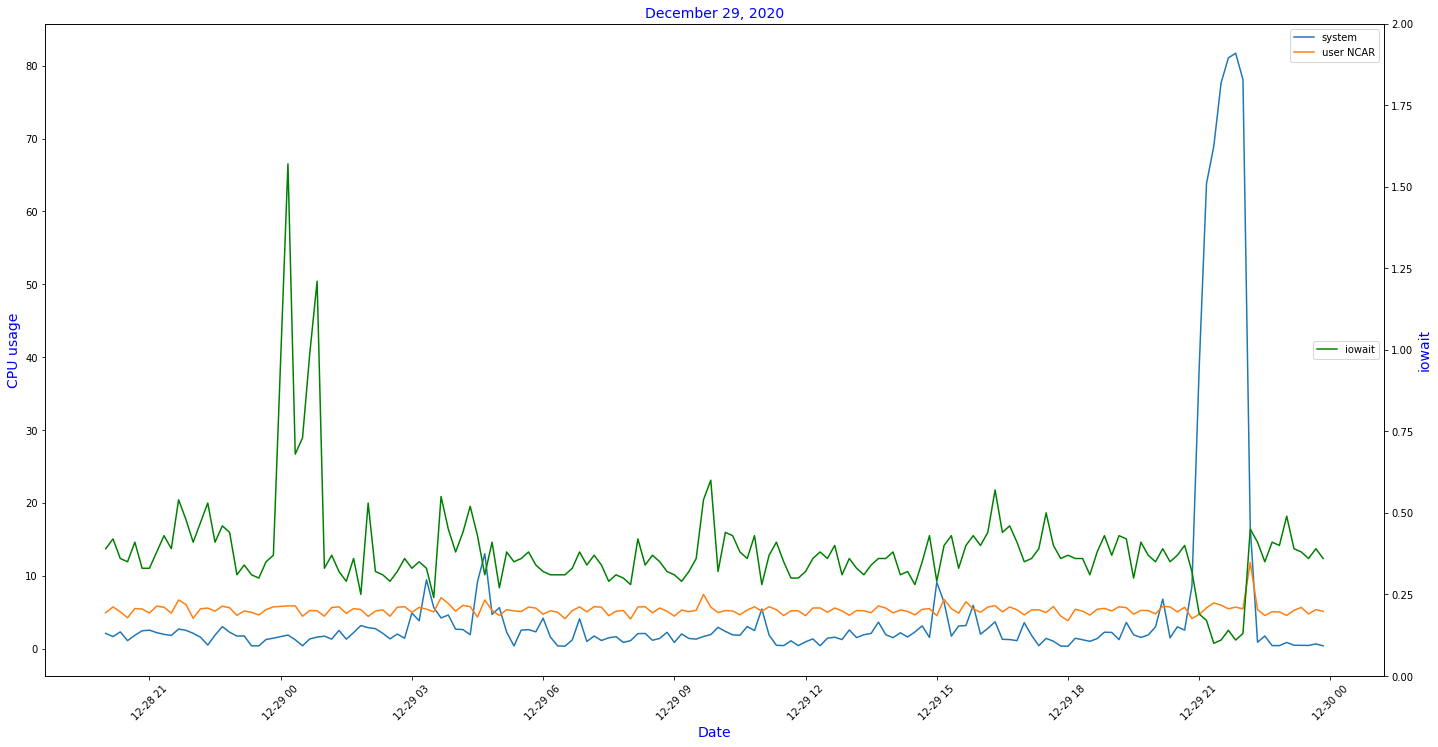

In [17]:
fig, ax = plt.subplots(figsize=(24, 12))
#
plt.setp(ax.get_xticklabels(), rotation=45)
#
locator = mdates.AutoDateLocator(minticks=40, maxticks=80)
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
#
#ax.set(xlabel="Date",
#       ylabel="system CPU usage",
#       title="")
ax.set_xlabel("Date", color='blue',fontsize=14)
ax.set_ylabel("CPU usage", color='blue', fontsize=14)
ax.set_title("December 29, 2020", color='blue',fontsize=14)

plt.plot(be_times, be_system, label='system')
plt.plot(be_times, be_user, label='user NCAR')
plt.legend()
#
ax2=ax.twinx()
ax2.plot(be_times, be_iowait, label='iowait', color='green')
ax2.set_ylabel("iowait",color="blue",fontsize=14)
ax2.set_ylim([0, 2])
plt.legend(loc='center right')